# Financial Time Series Analysis: 
## Task 1 - Data Preprocessing and EDA

 Objective: 
* This notebook focuses on cleaning, exploring, and analyzing financial data for Tesla (TSLA), Vanguard Bond ETF (BND), and S&P 500 ETF (SPY). 
* The processed data will be saved and used in subsequent tasks, including time series forecasting (Task 2).


## Import necessary libraries and functions

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))

In [2]:
from utils import (
    load_data, clean_data, normalize_data, calculate_daily_returns, 
    plot_normalized_data, plot_daily_returns, rolling_statistics, 
    plot_rolling_stats, detect_outliers, plot_outliers, 
    decompose_time_series, plot_decomposition, calculate_var_sharpe_ratio
)

## Load Historical Data

Using the `load_data` function, fetch the adjusted closing prices of TSLA, BND, and SPY from January 1, 2015, to October 31, 2024.

In [3]:
# Define the tickers and date range
tickers = ['TSLA', 'BND', 'SPY']
start_date = "2015-01-01"
end_date = "2024-10-31"

In [4]:
print("Loading data...")
data = load_data(tickers, start_date, end_date)

2024-11-20 07:52:33,866 - INFO - Loading data for tickers: ['TSLA', 'BND', 'SPY']


Loading data...


[*********************100%***********************]  3 of 3 completed
2024-11-20 07:52:37,533 - INFO - Data loaded successfully.


In [5]:
# Display the first few rows of the data
print("\nPreview of raw data:")
print(data.head())


Preview of raw data:
Ticker                           BND         SPY       TSLA
Date                                                       
2015-01-02 00:00:00+00:00  63.172363  173.173737  14.620667
2015-01-05 00:00:00+00:00  63.355782  170.046326  14.006000
2015-01-06 00:00:00+00:00  63.539223  168.444672  14.085333
2015-01-07 00:00:00+00:00  63.577412  170.543686  14.063333
2015-01-08 00:00:00+00:00  63.478065  173.569977  14.041333


## Clean the Data
Handle missing values by forward-filling. This ensures that any gaps in the data are filled without introducing biases.


In [6]:
cleaned_data = clean_data(data)

2024-11-20 07:52:43,324 - INFO - Missing values before cleaning: 0
2024-11-20 07:52:43,331 - INFO - Missing values after cleaning: 0


In [7]:
# Display the cleaned data statistics
print("\nData after cleaning:")
print(cleaned_data.describe())


Data after cleaning:
Ticker          BND          SPY         TSLA
count   2474.000000  2474.000000  2474.000000
mean      69.884952   310.253154   111.438965
std        4.876944   111.250656   110.120450
min       62.453281   157.328629     9.578000
25%       66.118979   214.822350    17.066167
50%       68.686226   275.812332    25.043000
75%       73.604727   402.297493   216.865002
max       79.578102   584.590027   409.970001


## Normalize the Data
Normalize the adjusted closing prices to enable comparison by setting all values to a base of 100% on the first date.


2024-11-20 07:52:50,315 - INFO - Normalizing data for comparison.
2024-11-20 07:52:50,322 - INFO - Plotting normalized price data.


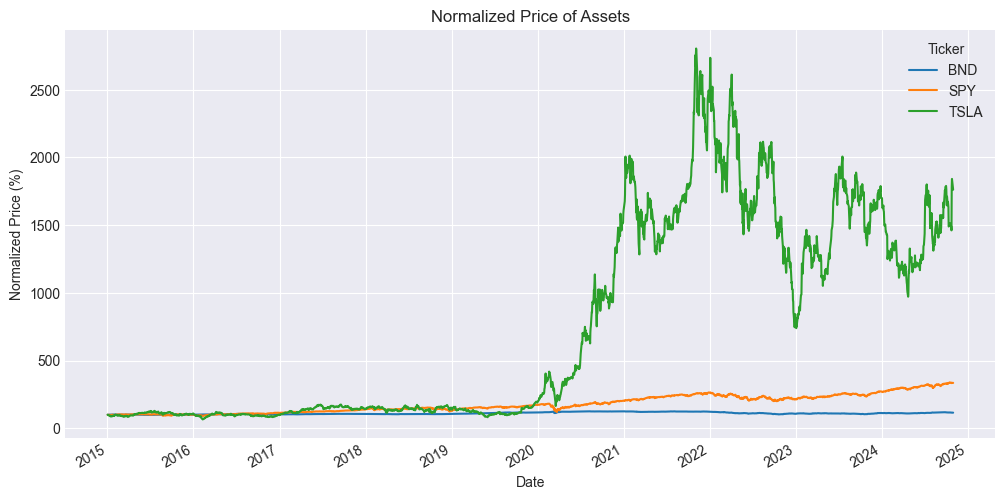

In [8]:
normalized_data = normalize_data(cleaned_data)

# Visualize the normalized data
plot_normalized_data(normalized_data)

## Calculate Daily Returns
Compute the percentage change in prices between consecutive trading days. Daily returns help analyze volatility and trends.


2024-11-20 07:52:56,577 - INFO - Calculating daily returns.
2024-11-20 07:52:56,587 - INFO - Plotting daily returns.


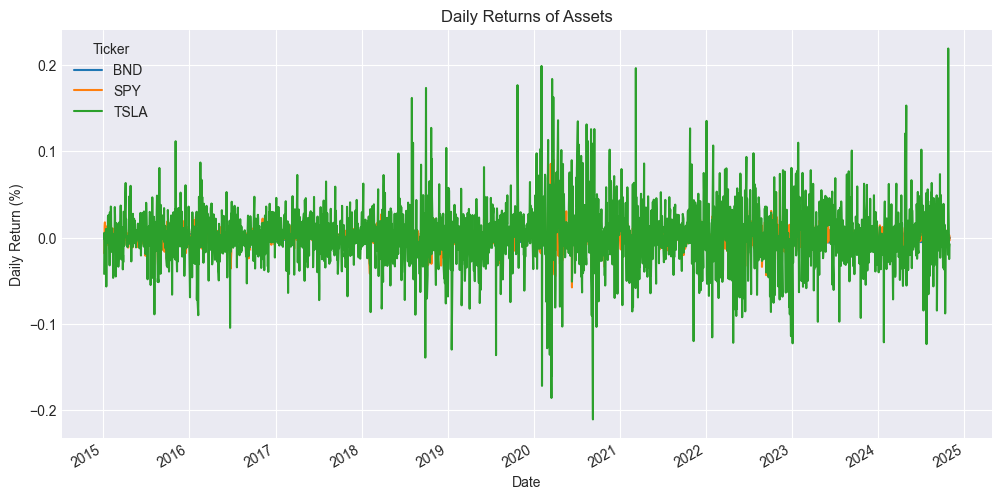

In [9]:
daily_returns = calculate_daily_returns(cleaned_data)

# Visualize the daily returns
plot_daily_returns(daily_returns)

 ## Analyze Rolling Statistics
  Calculate rolling mean and standard deviation (volatility) over a 30-day window to observe short-term trends and fluctuations.

2024-11-20 07:53:03,535 - INFO - Calculating rolling mean and standard deviation with window size 30.
2024-11-20 07:53:03,553 - INFO - Plotting rolling mean and standard deviation.


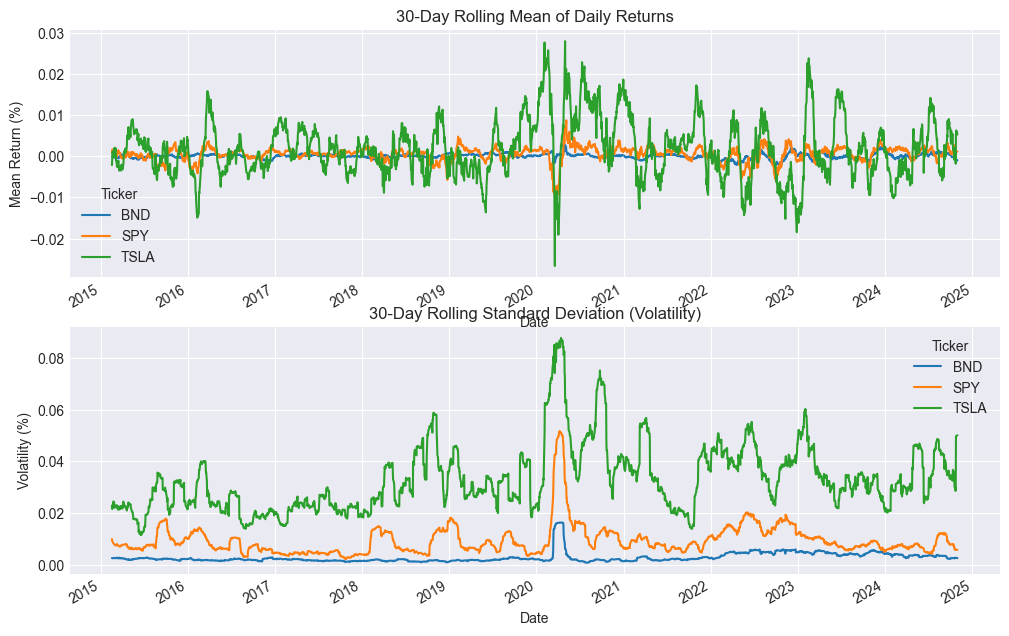

In [10]:
# Rolling Statistics for Volatility Analysis
rolling_mean, rolling_std = rolling_statistics(daily_returns)
plot_rolling_stats(rolling_mean, rolling_std)

## Detect and Visualize Outliers
 Identify significant anomalies in daily returns using a z-score threshold of 3. Highlight these outliers on the return plot.

2024-11-20 07:54:00,401 - INFO - Detecting outliers using a threshold of 3.
2024-11-20 07:54:00,767 - INFO - Number of outliers detected: 89


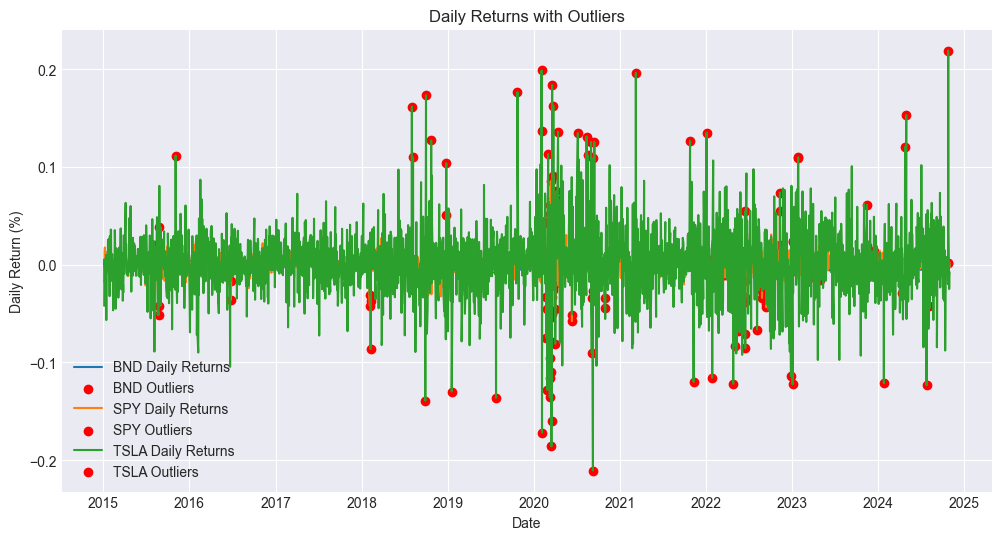

In [12]:
# Outlier Detection and Plotting
outliers = detect_outliers(daily_returns)
plot_outliers(daily_returns, outliers)

## Decompose Time Series (Example: Tesla)
Decompose the Tesla stock price time series into trend, seasonal, and residual components to understand patterns.



2024-11-20 07:54:53,982 - INFO - Decomposing time series for ticker: TSLA
2024-11-20 07:54:54,027 - INFO - Plotting seasonal decomposition.


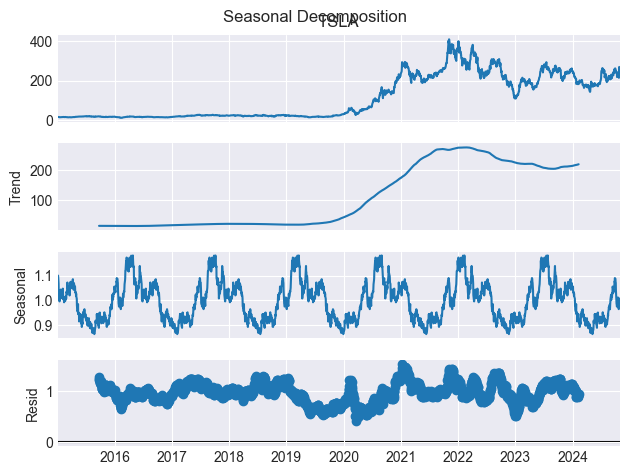

In [ ]:
# Time Series Decomposition for Tesla Stock
decomposition = decompose_time_series(cleaned_data, ticker='TSLA')

# Visualize the decomposition
plot_decomposition(decomposition)

## Calculate Risk Metrics
 Compute Value at Risk (VaR) and Sharpe Ratio for each asset. VaR estimates potential losses, while Sharpe Ratio evaluates risk-adjusted returns.


In [18]:
print("\nCalculatd Value at Risk (VaR) and Sharpe Ratio.")
for ticker in tickers:
    VaR, sharpe_ratio = calculate_var_sharpe_ratio(daily_returns, ticker)
    print(f"{ticker}: VaR = {VaR:.4f}, Sharpe Ratio = {sharpe_ratio:.2f}")

2024-11-20 07:57:45,178 - INFO - Calculating VaR and Sharpe Ratio for TSLA with 5.0% confidence.
2024-11-20 07:57:45,183 - INFO - VaR: -0.0513, Sharpe Ratio: 0.80
2024-11-20 07:57:45,186 - INFO - Calculating VaR and Sharpe Ratio for BND with 5.0% confidence.
2024-11-20 07:57:45,191 - INFO - VaR: -0.0048, Sharpe Ratio: 0.29
2024-11-20 07:57:45,194 - INFO - Calculating VaR and Sharpe Ratio for SPY with 5.0% confidence.
2024-11-20 07:57:45,198 - INFO - VaR: -0.0168, Sharpe Ratio: 0.79



Calculatd Value at Risk (VaR) and Sharpe Ratio.
TSLA: VaR = -0.0513, Sharpe Ratio = 0.80
BND: VaR = -0.0048, Sharpe Ratio = 0.29
SPY: VaR = -0.0168, Sharpe Ratio = 0.79


Save cleaned data, daily returns.

In [20]:

cleaned_data.to_csv('../data/cleaned_data.csv', index=True)
daily_returns.to_csv('../data/daily_returns.csv', index=True)